In [1]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import math

In [2]:
def cal_distance(x1,y1, x2,y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [3]:
image_path = "test3.jpg"
image = cv2.imread(image_path)
res_image = image.copy()
sen_image = image.copy()
bok_image = image.copy()
img_h, img_w, img_c = image.shape

In [4]:
ocr_res = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
for i in ocr_res:
    print(i, ocr_res[i])

level [1, 2, 3, 4, 5, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5]
page_num [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
block_num [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10]
par_num [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
line_num [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0

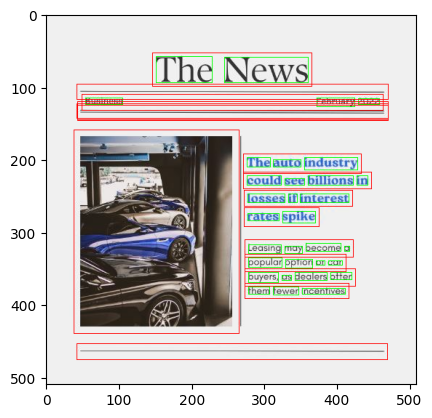

In [5]:
for i in range(len(ocr_res['text'])):
    lv = ocr_res['level'][i]
    x = ocr_res['left'][i]
    y = ocr_res['top'][i]
    w = ocr_res['width'][i]
    h = ocr_res['height'][i]

    conf = int(ocr_res['conf'][i])
    text = ocr_res['text'][i]
    text = text.strip()

    if lv == 4:
        cv2.rectangle(res_image, (x-5,y-5), (x+w+5,y+h+5), (255,0,0), 1)

    if conf > 50 and len(text) > 0:
        cv2.rectangle(res_image, (x,y), (x+w,y+h), (0,255,0), 1)
        #cv2.putText(res_image, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (180,0,0), 2)
plt.imshow(res_image)

In [6]:
def find_sentence(ocr_data):
    result = dict()
    result['text'] = []
    result['left'] = []
    result['top'] = []
    result['width'] = []
    result['height'] = []

    sentence_string = ''
    sentence_left = -1
    sentence_top = -1
    sentence_width = -1
    sentence_height = -1

    for i in range(len(ocr_data['text'])):
        lv = ocr_data['level'][i]
        x = ocr_data['left'][i]
        y = ocr_data['top'][i]
        w = ocr_data['width'][i]
        h = ocr_data['height'][i]

        conf = int(ocr_data['conf'][i])
        text = ocr_data['text'][i]
        text = text.strip()

        if lv == 4:
            if len(sentence_string.strip()) > 1:
                result['text'].append(sentence_string.strip())
                result['left'].append(sentence_left)
                result['top'].append(sentence_top)
                result['width'].append(sentence_width)
                result['height'].append(sentence_height)

                sentence_string = ''
                sentence_left = -1
                sentence_top = -1
                sentence_width = -1
                sentence_height = -1
        elif lv == 5:
            if conf > 50 and len(text) > 0:
                if sentence_left != -1 and sentence_left+sentence_width+w < x:
                    result['text'].append(sentence_string.strip())
                    result['left'].append(sentence_left)
                    result['top'].append(sentence_top)
                    result['width'].append(sentence_width)
                    result['height'].append(sentence_height)

                    sentence_string = ''
                    sentence_left = -1
                    sentence_top = -1
                    sentence_width = -1
                    sentence_height = -1

                    sentence_string += ' ' + text
                    sentence_left = x if sentence_left==-1 else min(sentence_left, x)
                    sentence_top = y if sentence_top==-1 else min(sentence_top, y)
                    sentence_width = w if sentence_width==-1 else max(sentence_left+sentence_width, x+w)-sentence_left
                    sentence_height = h if sentence_height==-1 else max(sentence_height, h)
                else:
                    sentence_string += ' ' + text
                    sentence_left = x if sentence_left==-1 else min(sentence_left, x)
                    sentence_top = y if sentence_top==-1 else min(sentence_top, y)
                    sentence_width = w if sentence_width==-1 else max(sentence_left+sentence_width, x+w)-sentence_left
                    sentence_height = h if sentence_height==-1 else max(sentence_height, h)

    if len(sentence_string.strip()) > 1:
        result['text'].append(sentence_string.strip())
        result['left'].append(sentence_left)
        result['top'].append(sentence_top)
        result['width'].append(sentence_width)
        result['height'].append(sentence_height)

    return result

In [7]:
sen_data = find_sentence(ocr_res)
for i in sen_data:
    print(i, sen_data[i])

text ['The News', 'Business', 'February 2022', 'The auto industry', 'could see billions in', 'losses if interest', 'rates spike', 'Leasing may become a', 'popular option or car', 'buyers, as dealers offer', 'them fewer incentives']
left [151, 54, 372, 276, 276, 277, 277, 278, 278, 278, 278]
top [58, 115, 115, 197, 222, 247, 271, 315, 335, 355, 375]
width [209, 51, 86, 152, 166, 139, 93, 139, 129, 142, 133]
height [36, 9, 12, 17, 13, 12, 16, 12, 13, 14, 11]


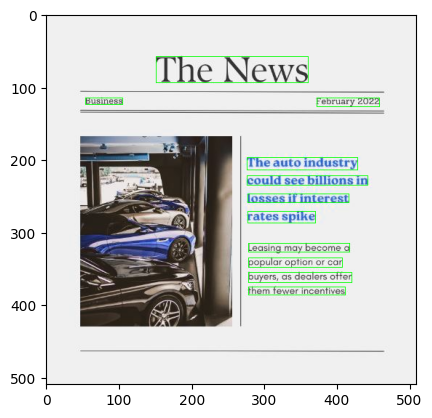

In [8]:
for i in range(len(sen_data['text'])):
    x = sen_data['left'][i]
    y = sen_data['top'][i]
    w = sen_data['width'][i]
    h = sen_data['height'][i]

    text = sen_data['text'][i]

    cv2.rectangle(sen_image, (x,y), (x+w, y+h), (0,255,0), 1)
    #cv2.putText(res_image, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (180,0,0), 2)
plt.imshow(sen_image)

In [9]:
def make_sentence_block(sentence_data):
    result = dict()
    result['text'] = []
    result['left'] = []
    result['top'] = []
    result['width'] = []
    result['height'] = []
    result['line'] = []
    result['lpos'] = []

    thr = 1.5
    
    block_string = sentence_data['text'][0]
    block_left = sentence_data['left'][0]
    block_top = sentence_data['top'][0]
    block_width = sentence_data['width'][0]
    block_height = sentence_data['height'][0]
    line = 1
    line_pos = [(block_left, block_top, block_width, block_height)]
    base_height = block_height

    for i in range(1, len(sentence_data['text'])):
        text = sentence_data['text'][i]
        x = sentence_data['left'][i]
        y = sentence_data['top'][i]
        w = sentence_data['width'][i]
        h = sentence_data['height'][i]

        distance = cal_distance(block_left, block_top+block_height, x,y)

        if h*thr < base_height or distance > base_height*thr:
            result['text'].append(block_string)
            result['left'].append(block_left)
            result['top'].append(block_top)
            result['width'].append(block_width)
            result['height'].append(block_height)
            result['line'].append(line)
            result['lpos'].append(line_pos)

            block_string = text
            block_left = x
            block_top = y
            block_width = w
            block_height = h
            line = 1
            line_pos = [(block_left, block_top, block_width, block_height)]
            base_height = h

        else:
            block_string += ' ' + text
            block_left = min(block_left, x)
            block_width = max(block_left+block_width, x+w)-block_left
            block_height = max(block_top+block_height, y+h)-block_top
            line += 1
            line_pos.append((x, y, w, h))

    result['text'].append(block_string)
    result['left'].append(block_left)
    result['top'].append(block_top)
    result['width'].append(block_width)
    result['height'].append(block_height)
    result['line'].append(line)
    result['lpos'].append(line_pos)
    
    return result

In [10]:
bok_data = make_sentence_block(sen_data)
for i in bok_data:
    print(i, bok_data[i])

text ['The News', 'Business', 'February 2022', 'The auto industry could see billions in losses if interest rates spike', 'Leasing may become a popular option or car buyers, as dealers offer them fewer incentives']
left [151, 54, 372, 276, 278]
top [58, 115, 115, 197, 315]
width [209, 51, 86, 166, 142]
height [36, 9, 12, 90, 71]
line [1, 1, 1, 4, 4]
lpos [[(151, 58, 209, 36)], [(54, 115, 51, 9)], [(372, 115, 86, 12)], [(276, 197, 152, 17), (276, 222, 166, 13), (277, 247, 139, 12), (277, 271, 93, 16)], [(278, 315, 139, 12), (278, 335, 129, 13), (278, 355, 142, 14), (278, 375, 133, 11)]]


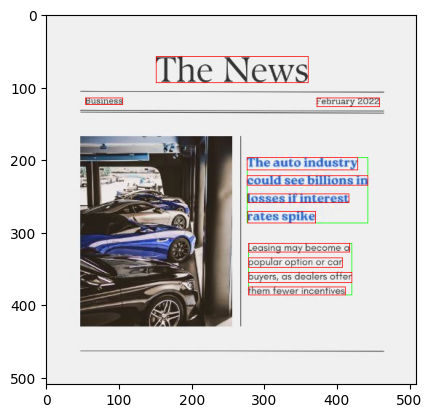

In [11]:
for i in range(len(bok_data['text'])):
    x = bok_data['left'][i]
    y = bok_data['top'][i]
    w = bok_data['width'][i]
    h = bok_data['height'][i]

    text = bok_data['text'][i]

    lpos = bok_data['lpos'][i]

    cv2.rectangle(bok_image, (x,y), (x+w, y+h), (0,255,0), 1)
    #cv2.putText(res_image, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (180,0,0), 2)

    for k in lpos:
        kx,ky,kw,kh = k
        cv2.rectangle(bok_image, (kx,ky), (kx+kw, ky+kh), (255,0,0), 1)
plt.imshow(bok_image)